In [1]:
import os

import numpy as np
import pandas as pd
from IPython.display import display

# Check if the environment is activated
if "CONDA_DEFAULT_ENV" in os.environ:
    print(f"Environment '{os.environ['CONDA_DEFAULT_ENV']}' is activated.")
else:
    print("No specific environment is activated.")

np.random.seed(42)

Environment 'research' is activated.


In [2]:
# Load the Boston dataset
dataset = "boston"
raw_df = pd.read_csv("data/boston.csv")
target = ["MEDV"]
features = raw_df.columns.drop(target)
target, features

(['MEDV'],
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'))

In [3]:
# # Load the store sales dataset
# dataset = "store_sales"
# excel_file = pd.ExcelFile("data/store_sales.xlsx")
# sheet_names = excel_file.sheet_names

# # Read the data
# raw_df = pd.read_excel(excel_file, sheet_name=sheet_names[2])  # 2, 9
# iri_key_counts = raw_df["IRI_KEY"].value_counts()
# iri_keys = iri_key_counts[iri_key_counts > 300].index


# target = ["Total.Volume"]
# features = ["F", "D", "Unit.Price"]

# raw_df = raw_df[raw_df["IRI_KEY"] == iri_keys[0]]

# sheet_names, iri_keys

In [4]:
# # Load the California housing dataset
# from sklearn.datasets import fetch_california_housing

# dataset = "california"
# housing = fetch_california_housing()
# target = housing.target_names
# features = housing.feature_names
# raw_df = pd.concat(
#     [
#         pd.DataFrame(housing.data, columns=housing.feature_names),
#         pd.DataFrame(housing.target, columns=housing.target_names),
#     ],
#     axis=1,
# )
# target, features

In [5]:
# # Load the soybean dataset
# dataset = "soybean"
# raw_df = pd.read_excel("data/soybean.xlsx")
# # X = raw_df.values[:-1, [5, 6, 15, 16, 17, 26,
# #                         34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]  # 9 check yield 12 rm band
# # y = raw_df.values[:-1, 11]
# X = raw_df.iloc[:-1, [5, 6, 15, 16, 17, 26,
#                   34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
# y = raw_df.iloc[:-1, [11]]
# X.shape, y.shape

In [6]:
# # Load LengthOfStay
# dataset = "LengthOfStay"
# raw_df = pd.read_csv("data/LengthOfStay.csv")
# raw_df = raw_df.drop(columns=["eid", "vdate", "discharged"])
# target = ["lengthofstay"]
# features = raw_df.columns.drop(target)
# target, features

In [7]:
# # Load HospitalStay
# dataset = "HospitalStay"
# raw_df = pd.read_csv("data/Healthcare_Investments_and_Hospital_Stay.csv")
# target = ["Hospital_Stay"]
# features = raw_df.columns.drop(target)
# target, features

In [8]:
import time

output_folder = f"output/{dataset}_{time.strftime('%F_%T')}"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
if not os.path.exists(f"{output_folder}/models"):
    os.makedirs(f"{output_folder}/models")

X = raw_df[features]
y = raw_df[target]

display(f"output: {output_folder}", X.describe(), y.describe())

'output: output/boston_2025-01-23_17:48:01'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [9]:
# # Remove Outliers
# def remove_outliers(df, threshold=3):
#     z_scores = np.abs((df - df.mean()) / df.std())
#     return df[(z_scores < threshold).all(axis=1)]
# filtered_train_data = train_data
# for col in train_data.columns:
#     value_counts = train_data[col].value_counts().sort(by="count")
#     valid = value_counts.filter(pl.col("count") > value_counts["count"].max()/len(value_counts))[col]
#     filtered_train_data = filtered_train_data.filter(pl.col(col).is_in(valid))
# display(filtered_train_data, filtered_train_data.describe())

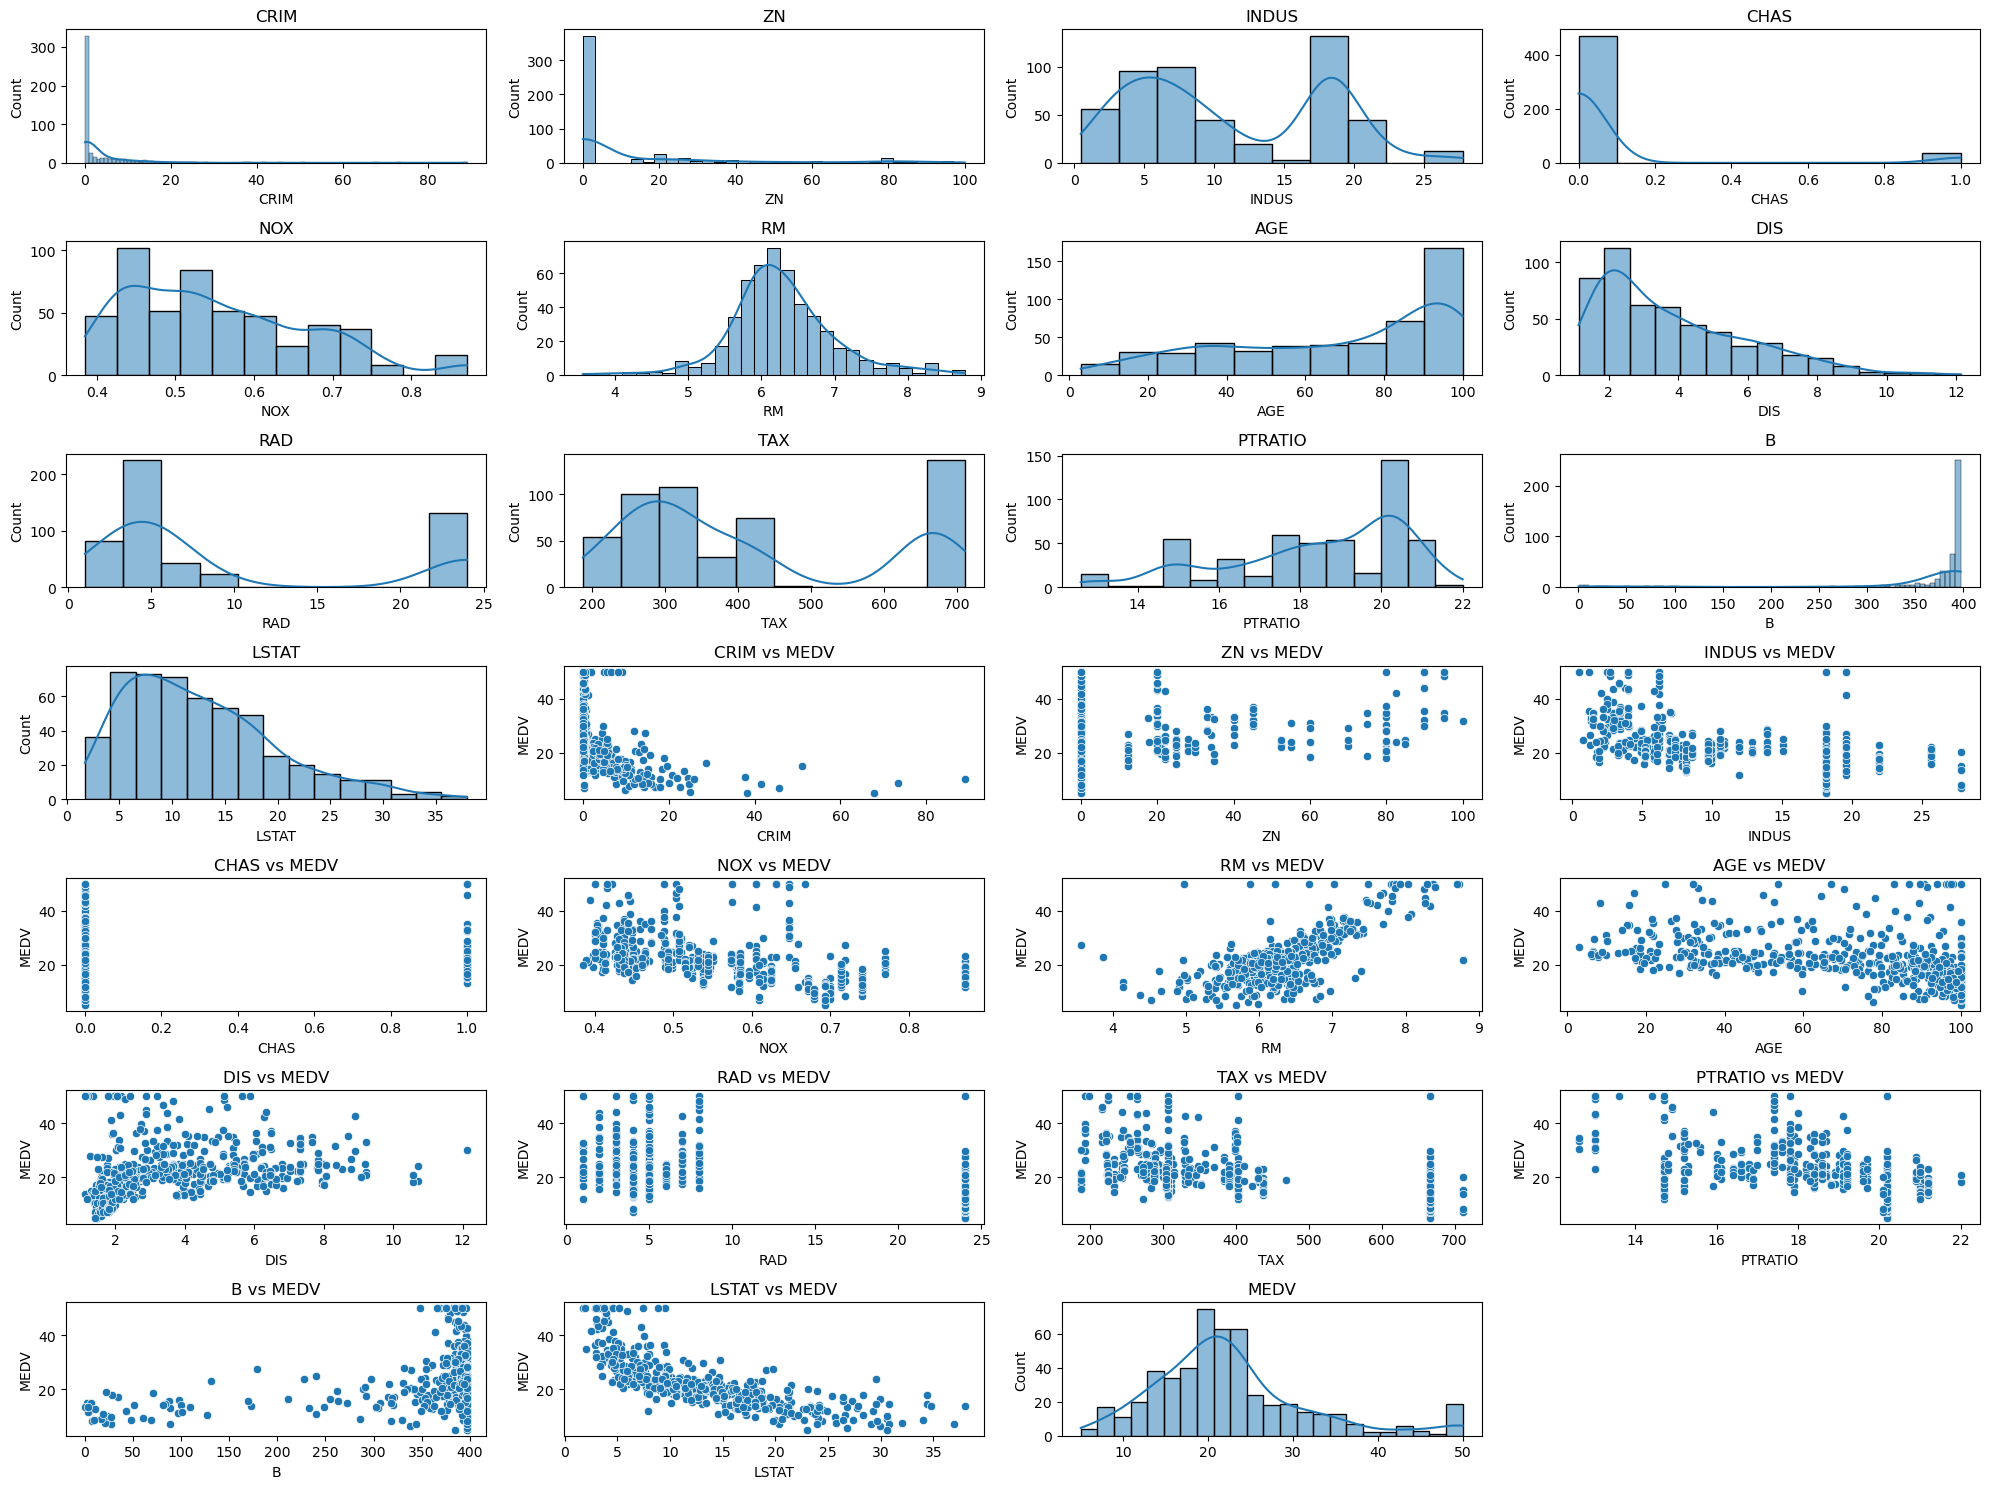

In [10]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns


def plot_data(X, y, cols=4):
    fig, axs = plt.subplots(
        (X.shape[1]+X.shape[1]*y.shape[1] + y.shape[1]+cols-1)//cols, cols, figsize=(20, 15))
    axs = axs.flatten()

    a = 0
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.tick_params(axis="both", which="major")
        ax.tick_params(axis="both", which="minor")
    a += i + 1
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        for j, ycol in enumerate(y.columns):
            ax = axs[a+i+j*y.shape[1]]
            sns.scatterplot(x=data, y=y[ycol], ax=ax)
            ax.set_title(f"{col} vs {ycol}")
            ax.set_xlabel(col)
            ax.set_ylabel(ycol)
    a += i + 1
    for i, col in enumerate(y.columns):
        data = y[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
    a += i+1
    for j in range(a, len(axs)):
        fig.delaxes(axs[j])

    fig.tight_layout()
    return fig
    
fig = plot_data(X, y)
fig.savefig(f"{output_folder}/data.png")
fig.show()

In [11]:
# Define search
from optuna.integration.sklearn import OptunaSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    TargetEncoder,
)

CATEGORICAL_PREPROCESSORS = {
    "drop": "drop",
    "ordinal": OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    "one_hot": OneHotEncoder(
        handle_unknown="ignore", max_categories=20, sparse_output=False
    ),
    "target": TargetEncoder(target_type="continuous"),
}

SCALERS = {
    "identity": None,
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "quantile": QuantileTransformer(),
}

search_params = {
    "cv": 5,
    "n_jobs": -1,  # -1,
    "n_trials": 10, # 1
    # "n_trials": None,
    "random_state": 42,
    "return_train_score": True,
    "scoring": "neg_mean_squared_error",  # r2
    # "timeout": 10,
    # "timeout": None,
    "verbose": 0,
}


def search(
    model,
    param_grid={},
    categorical_preprocessor="drop",
    scaler="identity",
    search_params=search_params,
):
    search_params = search_params.copy()
    # search_params["n_trials"] = int(4**len(param_grid))

    numerical_features = X.select_dtypes(include=["number"]).columns
    categorical_features = X.select_dtypes(include=["object", "category"]).columns
    preprocessor = ColumnTransformer(
        [
            ("numerical", "passthrough", numerical_features),
            (
                "categorical",
                CATEGORICAL_PREPROCESSORS[categorical_preprocessor],
                categorical_features,
            ),
        ]
    )

    return OptunaSearchCV(
        Pipeline(
            [
                ("categorical_preprocessor", preprocessor),
                ("scaler", SCALERS[scaler]),
                ("model", model),
            ]
        ),
        {f"model__{k}": v for k, v in param_grid.items()},
        **search_params,
    )

In [12]:
# Define search grids
from optuna.distributions import (
    CategoricalDistribution,
    FloatDistribution,
    IntDistribution,
)

mlp_sk_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(400, 400, log=True),
    "early_stopping": CategoricalDistribution([True]),
    "n_iter_no_change": IntDistribution(20,20)
}

# fonn1_sk_param_grid = {
#     "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
#     "max_iter": IntDistribution(400, 400, log=True),
# }

# fonn2_sk_param_grid = {
#     "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
#     "max_iter": IntDistribution(400, 400, log=True),
# }

mlp_TrANN_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(400, 400, log=True),
}

In [13]:
# from models import MLP, FONN1, FONN2, TREENN1, TREENN2
from models_sklearn import (
    Tree,
    Ensemble,
    MLP as MLP_sk,
    FONN1 as FONN1_sk,
    FONN2 as FONN2_sk,
    TREENN1 as TREENN1_sk,
    TREENN2 as TREENN2_sk,
)
from models_TrANN import (
    FONN1 as FONN1_TrANN,
    FONN2 as FONN2_TrANN,
    FONN3 as FONN3_TrANN,
    TREENN1 as TREENN1_TrANN,
    TREENN2 as TREENN2_TrANN,
    TREENN3 as TREENN3_TrANN,
)

models = {}

num_trees_input = 5
num_trees_hidden = 5
hidden_nodes = [10]
# hidden_nodes = [5, 10]

scalers = ["standard"]
categorical_preprocessor = ["target"]

models["Tree"] = search(Tree())
for hn in hidden_nodes:
    models[f"Ensemble_sk {hn}"] = search(Ensemble(hn))
    models[f"MLP_sk {hn}"] = search(MLP_sk(hn), mlp_sk_param_grid)
    models[f"FONN1_sk {num_trees_input} {hn}"] = search(
        FONN1_sk(num_trees_input, num_trees_input + hn), mlp_sk_param_grid
    )
    models[f"FONN2_sk {num_trees_hidden} {hn}"] = search(
        FONN2_sk(hn, num_trees_hidden + hn), mlp_sk_param_grid
    )
for hn in hidden_nodes:
    for c in categorical_preprocessor:
        for s in scalers:
            models[f"MLP_sk_{c}_{s} {hn}"] = search(MLP_sk(hn), mlp_sk_param_grid, c, s)
            models[f"FONN1_sk_{c}_{s} {num_trees_input} {hn}"] = search(
                FONN1_sk(num_trees_input, num_trees_input + hn),
                mlp_sk_param_grid,
                c,
                s,
            )
            models[f"FONN2_sk_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN2_sk(hn, num_trees_hidden + hn), mlp_sk_param_grid, c, s
           )

input_dim = X.shape[1]
output_dim = 1

for hn in hidden_nodes:
    models[f"FONN1_TrANN {num_trees_input} {hn}"] = search(
        FONN1_TrANN(input_dim, hn, output_dim, num_trees_input), mlp_TrANN_param_grid
    )
    models[f"FONN2_TrANN {num_trees_hidden} {hn}"] = search(
        FONN2_TrANN(input_dim, hn, output_dim, num_trees_hidden), mlp_TrANN_param_grid
    )
    models[f"FONN3_TrANN {num_trees_hidden} {hn}"] = search(
        FONN3_TrANN(input_dim, hn, output_dim, num_trees_hidden), mlp_TrANN_param_grid
    )
    models[f"TREENN1_TrANN {hn}"] = search(
        TREENN1_TrANN(input_dim, hn, output_dim), mlp_TrANN_param_grid
    )
    models[f"TREENN2_TrANN {hn}"] = search(
        TREENN2_TrANN(input_dim, hn, output_dim), mlp_TrANN_param_grid
    )
    models[f"TREENN3_TrANN {hn}"] = search(
        TREENN3_TrANN(input_dim, hn, output_dim), mlp_TrANN_param_grid
    )

display(models)

/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/tmp/ipykernel_3533311/3420515818.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_3533311/3420515818.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_3533311/3420515818.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_3533311/3420515818.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_3533311/3420515818.py:69

{'Tree': OptunaSearchCV(cv=5,
                estimator=Pipeline(steps=[('categorical_preprocessor',
                                           ColumnTransformer(transformers=[('numerical',
                                                                            'passthrough',
                                                                            Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object')),
                                                                           ('categorical',
                                                                            'drop',
                                                                            Index([], dtype='object'))])),
                                          ('scaler', None), ('model', Tree())]),
                n_jobs=-1, param_distributions={}, random_state=42,
                return_train_score=True, scoring='neg_mean_squared_error')

In [14]:
# Train and evaluate models
cv_results = {}
results = []

result_columns = [
    "model", "mean_fit_time", "mean_score_time", "mean_train_score", "mean_test_score"
]


def fit_model(name, model, X, y):
    print(f"Fitting {name}...")
    model.fit(X, y.to_numpy().ravel())
    result = model.cv_results_
    cv_results[name] = result
    return {
        "model": name,
        **{col: result[col][model.best_index_] for col in result}
    }


for name, model in models.items():
    results.append(fit_model(name, model, X, y))

raw_df = pd.DataFrame(results)
# results_df.set_index("model", inplace=True)
raw_df = raw_df[result_columns]
raw_df.to_csv(f"{output_folder}/results.csv", index=False)

[I 2025-01-23 17:48:11,644] A new study created in memory with name: no-name-0e77f30b-ee9b-4291-87a0-750cf3f4d946


Fitting Tree...


[I 2025-01-23 17:48:11,917] Trial 1 finished with value: -34.782061541448265 and parameters: {}. Best is trial 1 with value: -34.782061541448265.
[I 2025-01-23 17:48:12,032] Trial 4 finished with value: -42.15951951077461 and parameters: {}. Best is trial 1 with value: -34.782061541448265.
[I 2025-01-23 17:48:12,037] Trial 0 finished with value: -30.34273830324209 and parameters: {}. Best is trial 0 with value: -30.34273830324209.
[I 2025-01-23 17:48:12,076] Trial 3 finished with value: -45.384025820229084 and parameters: {}. Best is trial 0 with value: -30.34273830324209.
[I 2025-01-23 17:48:12,081] Trial 2 finished with value: -31.5515220345564 and parameters: {}. Best is trial 0 with value: -30.34273830324209.
[I 2025-01-23 17:48:12,097] Trial 6 finished with value: -43.55332983886625 and parameters: {}. Best is trial 0 with value: -30.34273830324209.
[I 2025-01-23 17:48:12,103] Trial 5 finished with value: -42.523314502038446 and parameters: {}. Best is trial 0 with value: -30.3427

Fitting Ensemble_sk 10...


[I 2025-01-23 17:48:13,311] Trial 4 finished with value: -23.240390234905846 and parameters: {}. Best is trial 4 with value: -23.240390234905846.
[I 2025-01-23 17:48:13,353] Trial 2 finished with value: -22.87309450592118 and parameters: {}. Best is trial 2 with value: -22.87309450592118.
[I 2025-01-23 17:48:13,386] Trial 5 finished with value: -23.364115886235687 and parameters: {}. Best is trial 2 with value: -22.87309450592118.
[I 2025-01-23 17:48:13,458] Trial 1 finished with value: -21.881386051252186 and parameters: {}. Best is trial 1 with value: -21.881386051252186.
[I 2025-01-23 17:48:13,465] Trial 6 finished with value: -27.662437115123282 and parameters: {}. Best is trial 1 with value: -21.881386051252186.
[I 2025-01-23 17:48:13,473] Trial 7 finished with value: -25.51561367695593 and parameters: {}. Best is trial 1 with value: -21.881386051252186.
[I 2025-01-23 17:48:13,481] Trial 0 finished with value: -23.967191993787612 and parameters: {}. Best is trial 1 with value: -21

Fitting MLP_sk 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged ye

Fitting FONN1_sk 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-23 17:49:16,870] Trial 3 finished with value: -92.31131343315144 and parameters: {'model__learning_rate_init': 0.0671889202032881, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 3 with value: -92.31131343315144.
[I 2025-01-23 17:49:17,436] Trial 9 finished with value: -26.98065600977143 and parameters: {'model__learning_rate_init': 0.049216932390626196, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 9 with value: -26.98065600977143.
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

Fitting FONN2_sk 5 10...


[I 2025-01-23 17:49:47,626] Trial 4 finished with value: -112.55070198487417 and parameters: {'model__learning_rate_init': 0.0432227089003047, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 4 with value: -112.55070198487417.
[I 2025-01-23 17:49:53,004] Trial 6 finished with value: -292.66306427686783 and parameters: {'model__learning_rate_init': 0.05122788471267424, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 4 with value: -112.55070198487417.
[I 2025-01-23 17:49:53,158] Trial 3 finished with value: -143.4590377393426 and parameters: {'model__learning_rate_init': 0.02270523630877884, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 4 with value: -112.55070198487417.
[I 2025-01-23 17:49:53,755] Trial 9 finished with value: -120.99202268399816 and parameters: {'model__learning_rate_init': 0.04934465929339191, 'model__max_iter':

Fitting MLP_sk_target_standard 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-23 17:50:11,800] Trial 4 finished with value: -29.399202244877234 and parameters: {'model__learning_rate_init': 0.06434047655492833, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 4 with value: -29.399202244877234.
[I 2025-01-23 17:50:11,992] Trial 7 finished with value: -23.457354840804875 and parameters: {'model__learning_rate_init': 0.06600438292004274, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_i

Fitting FONN1_sk_target_standard 5 10...


[I 2025-01-23 17:50:29,065] Trial 0 finished with value: -24.246442812098465 and parameters: {'model__learning_rate_init': 0.036977625604267386, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 0 with value: -24.246442812098465.
[I 2025-01-23 17:50:29,171] Trial 6 finished with value: -23.44010416270427 and parameters: {'model__learning_rate_init': 0.09896982945286986, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 6 with value: -23.44010416270427.
[I 2025-01-23 17:50:29,493] Trial 4 finished with value: -27.212683584555897 and parameters: {'model__learning_rate_init': 0.06526148475296173, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 6 with value: -23.44010416270427.
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: 

Fitting FONN2_sk_target_standard 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-23 17:51:03,784] Trial 3 finished with value: -77.40982415308238 and parameters: {'model__learning_rate_init': 0.053365144798376916, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 3 with value: -77.40982415308238.
[I 2025-01-23 17:51:05,734] Trial 6 finished with value: -37.47321825997143 and parameters: {'model__learning_rate_init': 0.08160064587944903, 'model__max_iter': 400, 'model__early_stopping': True, 'model__n_iter_no_change': 20}. Best is trial 6 with value: -37.47321825997143.
[I 2025-01-23 17:51:14,457] Trial 5 finished with value: -29.264242119443274 and parameters: {'model__learning_rate_init': 0.05344045461340116, 'model__max_iter': 400, 'model__early_stoppi

Fitting FONN1_TrANN 5 10...


[I 2025-01-23 17:52:08,843] Trial 9 finished with value: -91.46440322599592 and parameters: {'model__learning_rate': 0.05587171437247173, 'model__max_iter': 400}. Best is trial 9 with value: -91.46440322599592.
[I 2025-01-23 17:52:08,860] Trial 8 finished with value: -86.1716876624724 and parameters: {'model__learning_rate': 0.06932003728956242, 'model__max_iter': 400}. Best is trial 8 with value: -86.1716876624724.
[I 2025-01-23 17:52:08,876] Trial 4 finished with value: -73.8607809586493 and parameters: {'model__learning_rate': 0.033240874577404954, 'model__max_iter': 400}. Best is trial 4 with value: -73.8607809586493.
[I 2025-01-23 17:52:09,161] Trial 6 finished with value: -80.65689311371094 and parameters: {'model__learning_rate': 0.011793339252453378, 'model__max_iter': 400}. Best is trial 4 with value: -73.8607809586493.
[I 2025-01-23 17:52:09,376] Trial 7 finished with value: -72.27128195903832 and parameters: {'model__learning_rate': 0.015724828866833414, 'model__max_iter': 4

Fitting FONN2_TrANN 5 10...


[I 2025-01-23 17:52:44,076] Trial 6 finished with value: -33.54677283953246 and parameters: {'model__learning_rate': 0.050971898106998384, 'model__max_iter': 400}. Best is trial 6 with value: -33.54677283953246.
[I 2025-01-23 17:52:44,273] Trial 5 finished with value: -49.22625807628927 and parameters: {'model__learning_rate': 0.09143905864605731, 'model__max_iter': 400}. Best is trial 6 with value: -33.54677283953246.
[I 2025-01-23 17:52:44,347] Trial 7 finished with value: -30.658888486284276 and parameters: {'model__learning_rate': 0.010425216693098283, 'model__max_iter': 400}. Best is trial 7 with value: -30.658888486284276.
[I 2025-01-23 17:52:44,479] Trial 9 finished with value: -59.4138344625609 and parameters: {'model__learning_rate': 0.06284754458790431, 'model__max_iter': 400}. Best is trial 7 with value: -30.658888486284276.
[I 2025-01-23 17:52:44,785] Trial 3 finished with value: -30.435745156879413 and parameters: {'model__learning_rate': 0.015331615474830553, 'model__max_

Fitting FONN3_TrANN 5 10...


[I 2025-01-23 17:53:21,880] Trial 0 finished with value: -71.55932613974628 and parameters: {'model__learning_rate': 0.0623078891191524, 'model__max_iter': 400}. Best is trial 0 with value: -71.55932613974628.
[I 2025-01-23 17:53:22,155] Trial 9 finished with value: -64.02040447379967 and parameters: {'model__learning_rate': 0.011695635372127287, 'model__max_iter': 400}. Best is trial 9 with value: -64.02040447379967.
[I 2025-01-23 17:53:22,191] Trial 3 finished with value: -66.43159930159354 and parameters: {'model__learning_rate': 0.053283745603298766, 'model__max_iter': 400}. Best is trial 9 with value: -64.02040447379967.
[I 2025-01-23 17:53:22,222] Trial 6 finished with value: -66.647352434586 and parameters: {'model__learning_rate': 0.015675244190232477, 'model__max_iter': 400}. Best is trial 9 with value: -64.02040447379967.
[I 2025-01-23 17:53:22,264] Trial 4 finished with value: -64.36811045538118 and parameters: {'model__learning_rate': 0.028970734187016848, 'model__max_iter'

Fitting TREENN1_TrANN 10...


[I 2025-01-23 17:53:41,169] Trial 7 finished with value: -81.57168024528502 and parameters: {'model__learning_rate': 0.026175327459401942, 'model__max_iter': 400}. Best is trial 7 with value: -81.57168024528502.
[I 2025-01-23 17:53:41,174] Trial 6 finished with value: -91.2764011634564 and parameters: {'model__learning_rate': 0.08991346858763859, 'model__max_iter': 400}. Best is trial 7 with value: -81.57168024528502.
[I 2025-01-23 17:53:41,273] Trial 1 finished with value: -86.50922166924269 and parameters: {'model__learning_rate': 0.016271680684197116, 'model__max_iter': 400}. Best is trial 7 with value: -81.57168024528502.
[I 2025-01-23 17:53:41,448] Trial 5 finished with value: -86.28377659032097 and parameters: {'model__learning_rate': 0.06280940503459395, 'model__max_iter': 400}. Best is trial 7 with value: -81.57168024528502.
[I 2025-01-23 17:53:41,526] Trial 2 finished with value: -75.73152054528092 and parameters: {'model__learning_rate': 0.011718824493762416, 'model__max_iter

Fitting TREENN2_TrANN 10...


[I 2025-01-23 17:54:00,484] Trial 5 finished with value: -53.100505613618886 and parameters: {'model__learning_rate': 0.08135744880769692, 'model__max_iter': 400}. Best is trial 5 with value: -53.100505613618886.
[I 2025-01-23 17:54:00,603] Trial 7 finished with value: -38.32095343419404 and parameters: {'model__learning_rate': 0.05162614959618812, 'model__max_iter': 400}. Best is trial 7 with value: -38.32095343419404.
[I 2025-01-23 17:54:00,729] Trial 9 finished with value: -36.51403527412616 and parameters: {'model__learning_rate': 0.027735107671273525, 'model__max_iter': 400}. Best is trial 9 with value: -36.51403527412616.
[I 2025-01-23 17:54:01,109] Trial 6 finished with value: -38.584869804164796 and parameters: {'model__learning_rate': 0.09025567717078722, 'model__max_iter': 400}. Best is trial 9 with value: -36.51403527412616.
[I 2025-01-23 17:54:01,146] Trial 3 finished with value: -36.9595641821507 and parameters: {'model__learning_rate': 0.02903551278893385, 'model__max_ite

Fitting TREENN3_TrANN 10...


[I 2025-01-23 17:54:19,231] Trial 5 finished with value: -75.07195681163685 and parameters: {'model__learning_rate': 0.06434353542434831, 'model__max_iter': 400}. Best is trial 5 with value: -75.07195681163685.
[I 2025-01-23 17:54:19,480] Trial 9 finished with value: -71.48808482557115 and parameters: {'model__learning_rate': 0.035057646413849, 'model__max_iter': 400}. Best is trial 9 with value: -71.48808482557115.
[I 2025-01-23 17:54:19,678] Trial 3 finished with value: -72.16298001632765 and parameters: {'model__learning_rate': 0.04593073752592681, 'model__max_iter': 400}. Best is trial 9 with value: -71.48808482557115.
[I 2025-01-23 17:54:19,773] Trial 8 finished with value: -68.7924761000791 and parameters: {'model__learning_rate': 0.015901717394276937, 'model__max_iter': 400}. Best is trial 8 with value: -68.7924761000791.
[I 2025-01-23 17:54:19,888] Trial 7 finished with value: -71.92597426427164 and parameters: {'model__learning_rate': 0.019882337835253436, 'model__max_iter': 4

In [15]:
display(raw_df,
        raw_df.sort_values(by="mean_test_score", ascending=False),
        raw_df.sort_values(by="mean_train_score", ascending=False))

,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
0,Tree,0.033767,0.013493,-8.195633,-30.342738
1,Ensemble_sk 10,0.169715,0.021826,-2.188399,-21.881386
2,MLP_sk 10,8.939302,0.037222,-25.919272,-42.317967
3,FONN1_sk 5 10,4.709481,0.030831,-3.048581,-23.274729
4,FONN2_sk 5 10,6.300951,0.009142,-58.969860,-51.505598
5,MLP_sk_target_standard 10,2.291696,0.002181,-13.371598,-23.457355
6,FONN1_sk_target_standard 5 10,2.822511,0.004123,-2.816049,-23.193061
7,FONN2_sk_target_standard 5 10,10.911031,0.012301,-12.320169,-27.134618
8,FONN1_TrANN 5 10,7.822509,0.007649,-69.247431,-72.105389
9,FONN2_TrANN 5 10,6.716337,0.003934,-7.352911,-29.922492


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
1,Ensemble_sk 10,0.169715,0.021826,-2.188399,-21.881386
6,FONN1_sk_target_standard 5 10,2.822511,0.004123,-2.816049,-23.193061
3,FONN1_sk 5 10,4.709481,0.030831,-3.048581,-23.274729
5,MLP_sk_target_standard 10,2.291696,0.002181,-13.371598,-23.457355
7,FONN2_sk_target_standard 5 10,10.911031,0.012301,-12.320169,-27.134618
9,FONN2_TrANN 5 10,6.716337,0.003934,-7.352911,-29.922492
0,Tree,0.033767,0.013493,-8.195633,-30.342738
12,TREENN2_TrANN 10,3.572485,0.009433,-6.947359,-36.514035
2,MLP_sk 10,8.939302,0.037222,-25.919272,-42.317967
4,FONN2_sk 5 10,6.300951,0.009142,-58.969860,-51.505598


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
1,Ensemble_sk 10,0.169715,0.021826,-2.188399,-21.881386
6,FONN1_sk_target_standard 5 10,2.822511,0.004123,-2.816049,-23.193061
3,FONN1_sk 5 10,4.709481,0.030831,-3.048581,-23.274729
12,TREENN2_TrANN 10,3.572485,0.009433,-6.947359,-36.514035
9,FONN2_TrANN 5 10,6.716337,0.003934,-7.352911,-29.922492
0,Tree,0.033767,0.013493,-8.195633,-30.342738
7,FONN2_sk_target_standard 5 10,10.911031,0.012301,-12.320169,-27.134618
5,MLP_sk_target_standard 10,2.291696,0.002181,-13.371598,-23.457355
2,MLP_sk 10,8.939302,0.037222,-25.919272,-42.317967
10,FONN3_TrANN 5 10,7.190918,0.006498,-39.188507,-60.252589


In [16]:
pd.DataFrame({name: model.best_params_ for name,
             model in models.items()}).transpose()

,model__learning_rate_init,model__max_iter,model__early_stopping,model__n_iter_no_change,model__learning_rate
Tree,NaN,NaN,NaN,NaN,NaN
Ensemble_sk 10,NaN,NaN,NaN,NaN,NaN
MLP_sk 10,0.038591,400,True,20,NaN
FONN1_sk 5 10,0.095816,400,True,20,NaN
FONN2_sk 5 10,0.043145,400,True,20,NaN
MLP_sk_target_standard 10,0.066004,400,True,20,NaN
FONN1_sk_target_standard 5 10,0.012084,400,True,20,NaN
FONN2_sk_target_standard 5 10,0.011101,400,True,20,NaN
FONN1_TrANN 5 10,NaN,400.0,NaN,NaN,0.034641
FONN2_TrANN 5 10,NaN,400.0,NaN,NaN,0.010075


In [17]:
# Predictions
predictions = pd.DataFrame(
    {name: model.best_estimator_.predict(X).ravel() for name, model in models.items()})
display(pd.concat([y, predictions], axis=1),
        pd.concat([y, predictions], axis=1).describe())

,MEDV,Tree,Ensemble_sk 10,MLP_sk 10,FONN1_sk 5 10,FONN2_sk 5 10,MLP_sk_target_standard 10,FONN1_sk_target_standard 5 10,FONN2_sk_target_standard 5 10,FONN1_TrANN 5 10,FONN2_TrANN 5 10,FONN3_TrANN 5 10,TREENN1_TrANN 10,TREENN2_TrANN 10,TREENN3_TrANN 10
0,24.0,24.0,26.67,30.752226,28.437814,29.222812,24.468324,23.014202,26.941614,27.111585,25.287526,24.051277,23.217972,25.463143,23.593767
1,21.6,21.6,21.95,24.886568,19.561995,25.466228,22.586349,22.514087,23.319201,27.111585,21.064986,22.575145,23.217972,20.953535,23.003314
2,34.7,34.7,34.27,29.983314,34.188862,28.892738,31.122687,33.240064,31.938119,27.111585,31.772473,26.318311,23.217972,32.388967,24.500581
3,33.4,36.2,33.57,29.710120,32.623175,28.805018,31.522261,33.986979,30.650120,27.111585,31.772452,26.318311,23.217972,32.388967,24.500581
4,36.2,36.2,35.69,28.757364,35.007368,27.468397,31.106155,36.147371,30.896379,27.111585,31.772473,26.318311,23.217972,32.388967,24.500581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,22.4,22.61,26.666305,24.318267,23.688429,23.159062,24.897173,21.792043,27.111585,25.287526,24.051277,23.217972,25.463143,23.593767
502,20.6,20.6,20.35,26.164460,20.118750,24.697006,21.267182,20.888283,20.545883,27.111585,21.064986,22.575145,23.217972,20.953535,23.003314
503,23.9,37.3,23.83,31.551046,29.077502,29.034626,28.035780,23.853646,26.387136,27.111585,28.427474,25.148953,23.217972,28.816560,24.032838
504,22.0,22.0,22.62,30.232840,24.559451,27.970569,25.627627,24.695851,23.630084,27.111585,25.287526,24.051277,23.217972,25.463143,23.593767


,MEDV,Tree,Ensemble_sk 10,MLP_sk 10,FONN1_sk 5 10,FONN2_sk 5 10,MLP_sk_target_standard 10,FONN1_sk_target_standard 5 10,FONN2_sk_target_standard 5 10,FONN1_TrANN 5 10,FONN2_TrANN 5 10,FONN3_TrANN 5 10,TREENN1_TrANN 10,TREENN2_TrANN 10,TREENN3_TrANN 10
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,22.443281,22.594802,22.638832,22.223593,20.673879,22.416891,22.618510,22.708664,23.442505,21.792680,22.541256,22.544140,22.167850,22.539135
std,9.197104,9.114148,8.868342,7.445107,9.082001,8.313060,8.725544,9.105301,8.793334,4.133878,7.577811,3.461178,2.401413,7.807765,2.763903
min,5.000000,5.000000,5.410000,-5.351085,4.147337,-0.231756,4.417338,3.585117,3.357218,12.247062,9.214290,12.106662,14.002863,9.179116,12.726516
25%,17.025000,16.500000,17.352500,18.715670,16.827990,16.173952,16.489539,16.955356,17.097158,21.174007,18.033424,21.515359,23.217972,17.715872,22.579400
50%,21.200000,20.950000,21.150000,22.829381,20.827359,20.767593,21.251100,21.374053,21.325599,21.690316,21.064986,22.575145,23.217972,20.953535,23.003314
75%,25.000000,25.075000,25.180000,27.410607,25.267446,24.504753,26.117710,25.360670,26.386411,27.111585,25.287520,24.051277,23.217972,25.463143,23.593767
max,50.000000,50.000000,50.000000,40.548386,49.893489,75.828573,52.629791,51.207420,54.712500,27.111585,44.417739,30.815531,23.217972,46.128042,26.299469


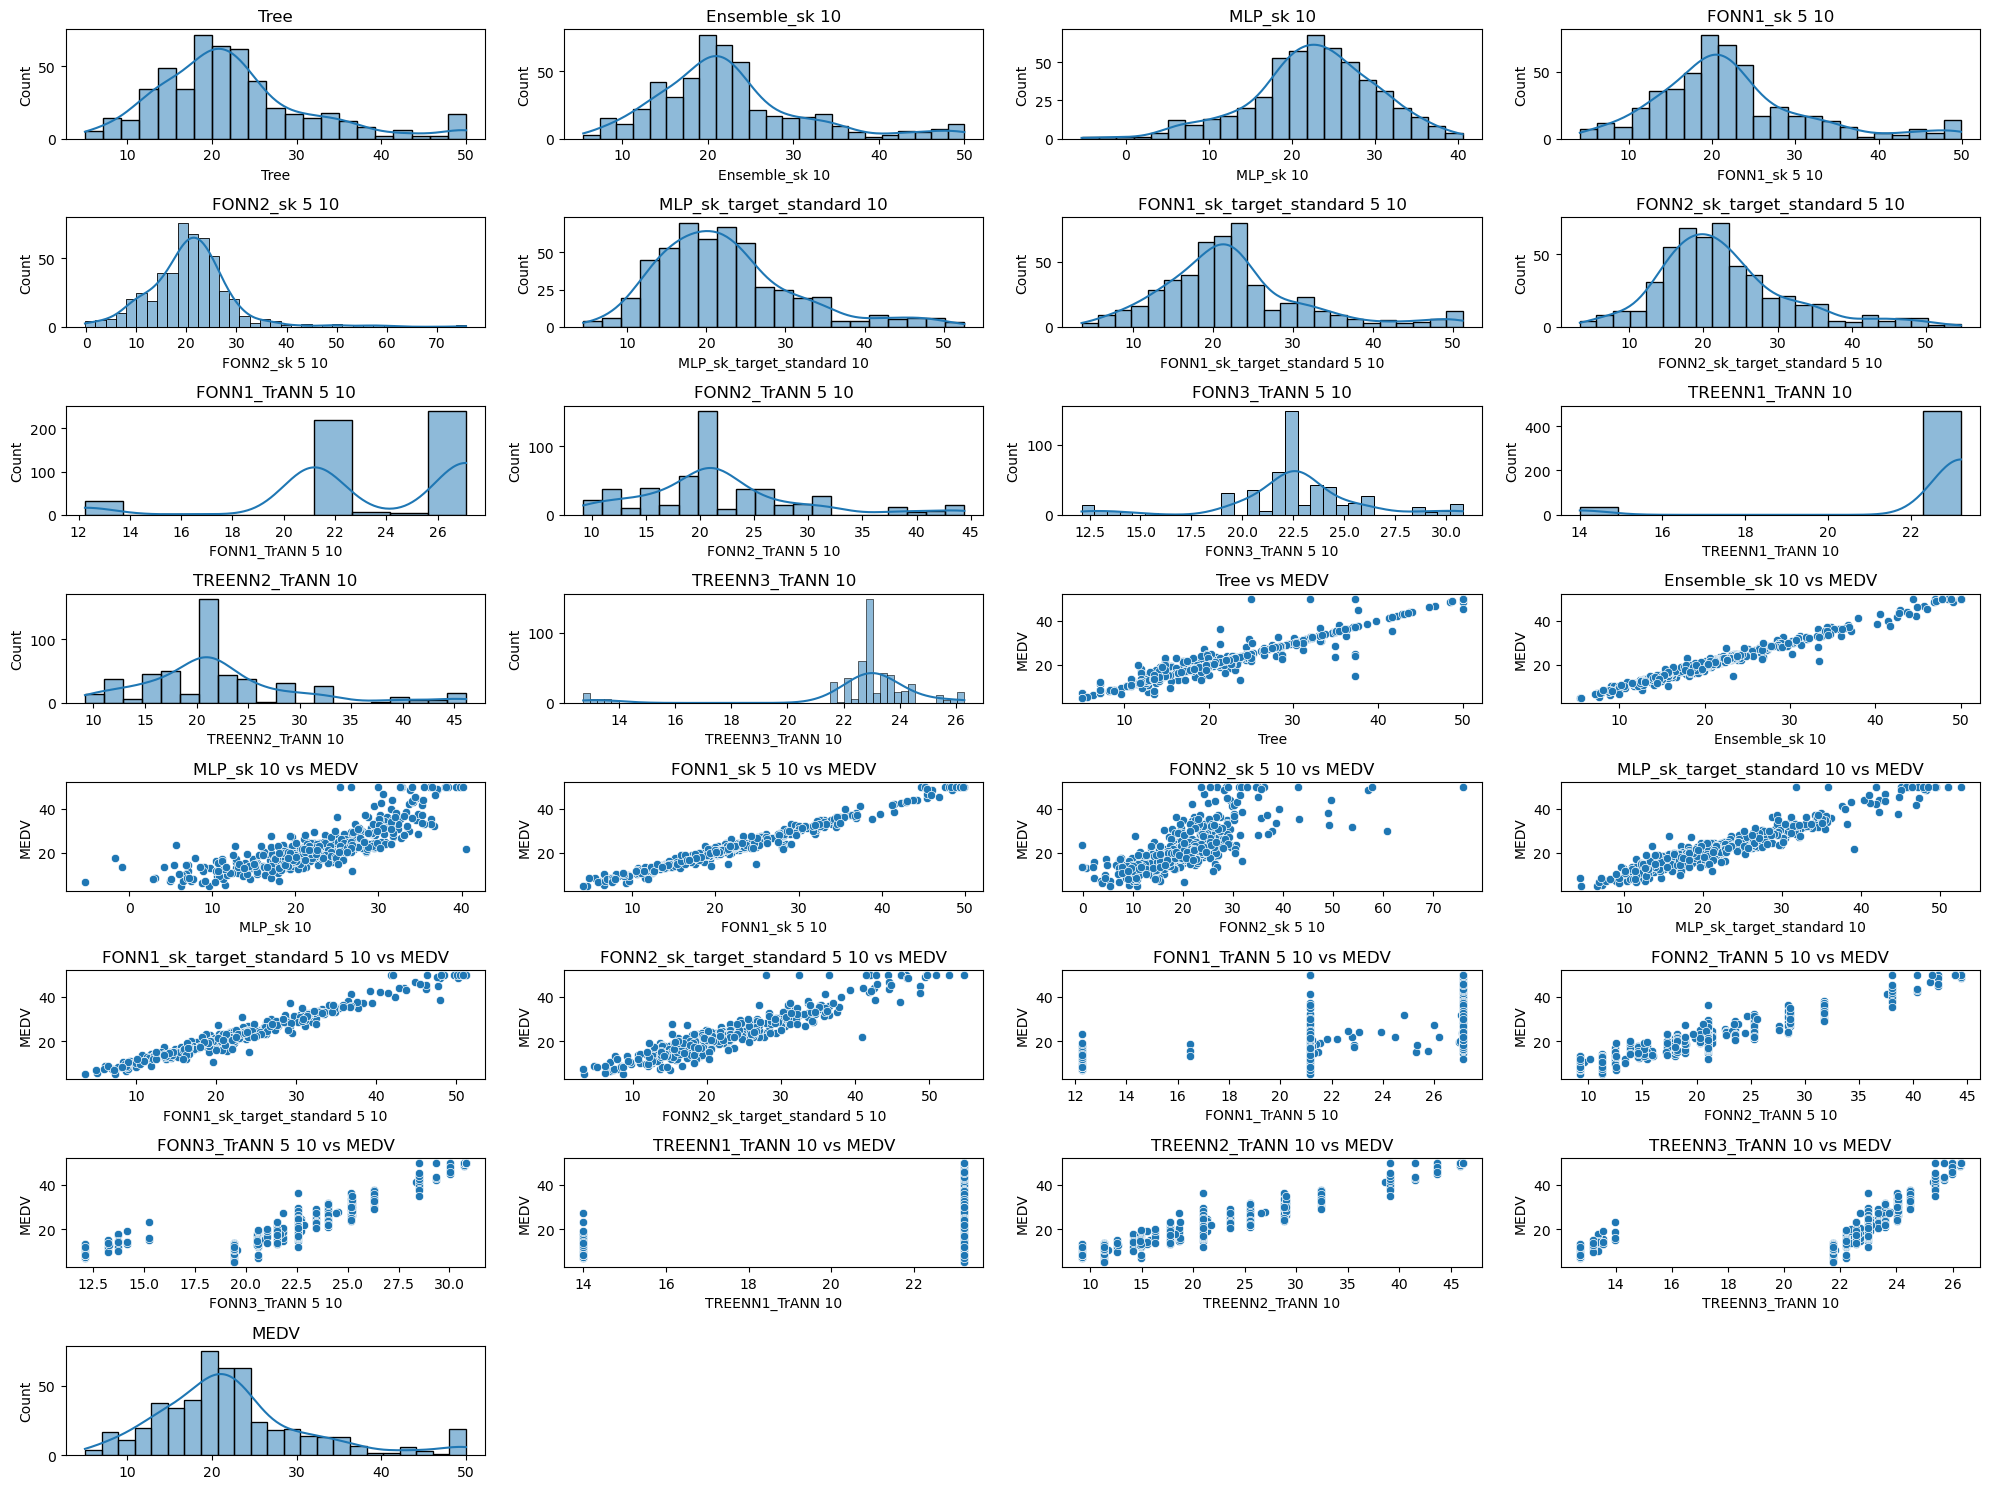

In [18]:
# Plot Predictions
fig = plot_data(predictions, y)
fig.savefig(f"{output_folder}/predictions.png")

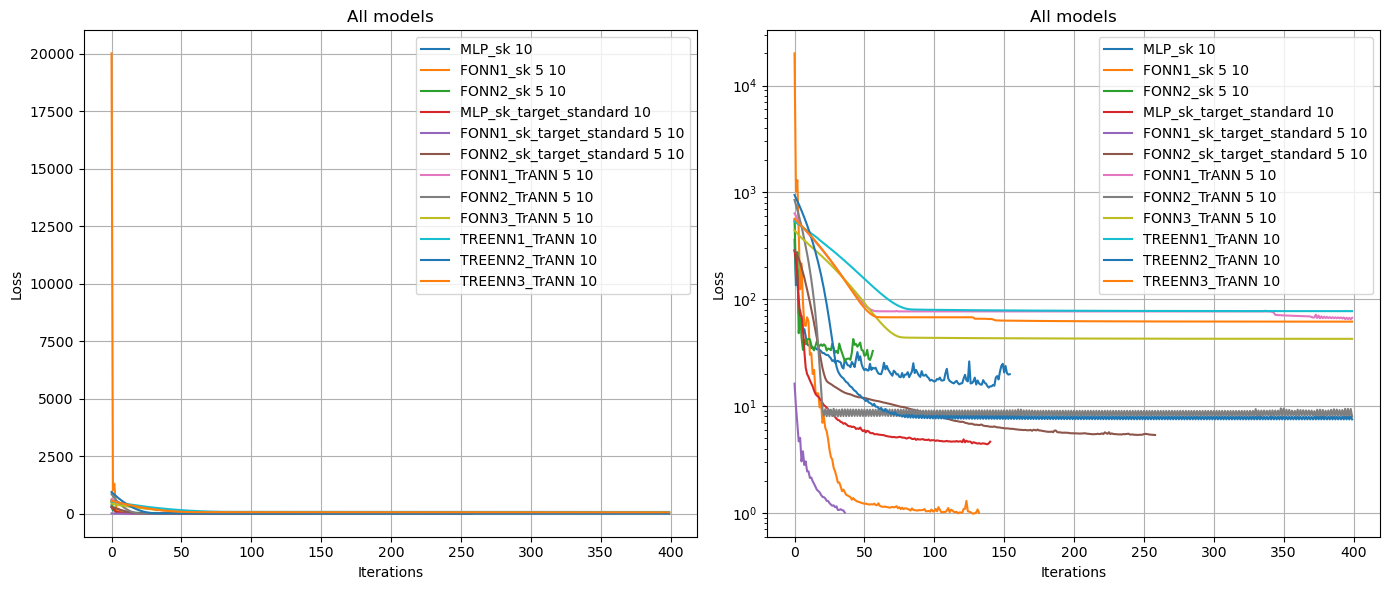

In [19]:
# Plot all models

def plot_loss(model, ax1, ax2, label):
    ax1.plot(model.loss_curve_, label=label)
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.grid(True)

    ax2.plot(model.loss_curve_, label=label)
    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        plot_loss(model.best_estimator_["model"], ax1, ax2, label=model_name)

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.set_title("All models")
ax1.legend()
ax1.grid(True)

ax2.set_yscale("log")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.set_title("All models")
ax2.legend()
ax2.grid(True)

fig.tight_layout()
fig.savefig(f"{output_folder}/models/models.png")
fig.show()

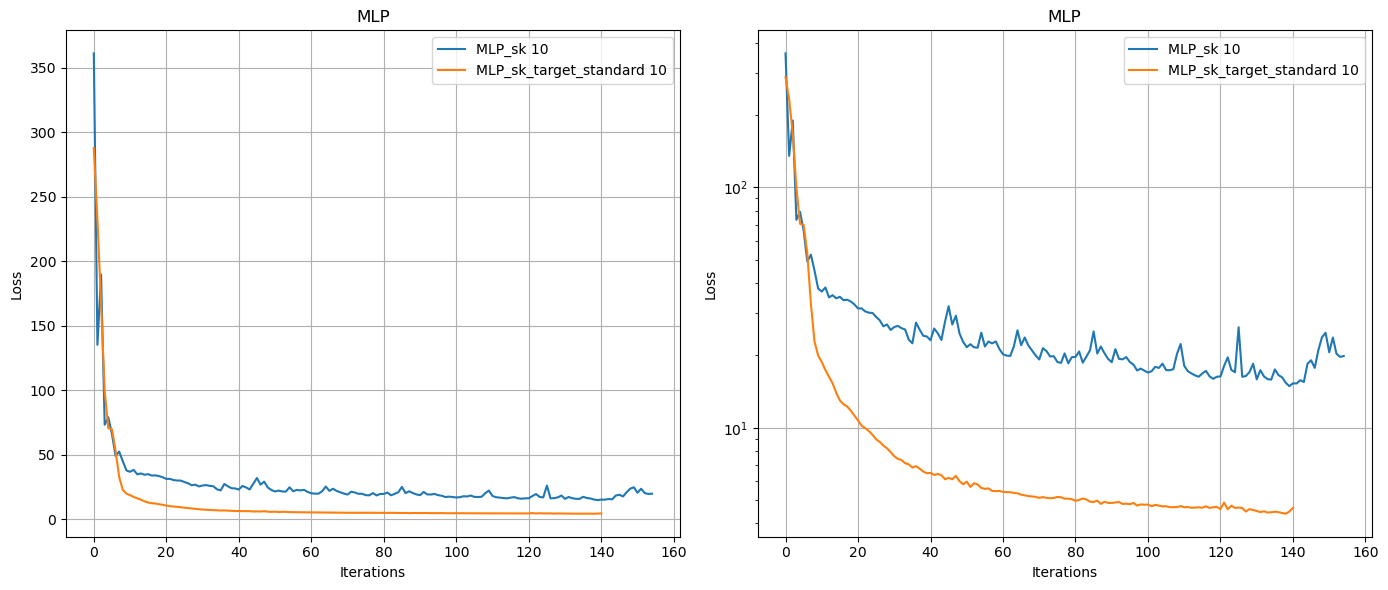

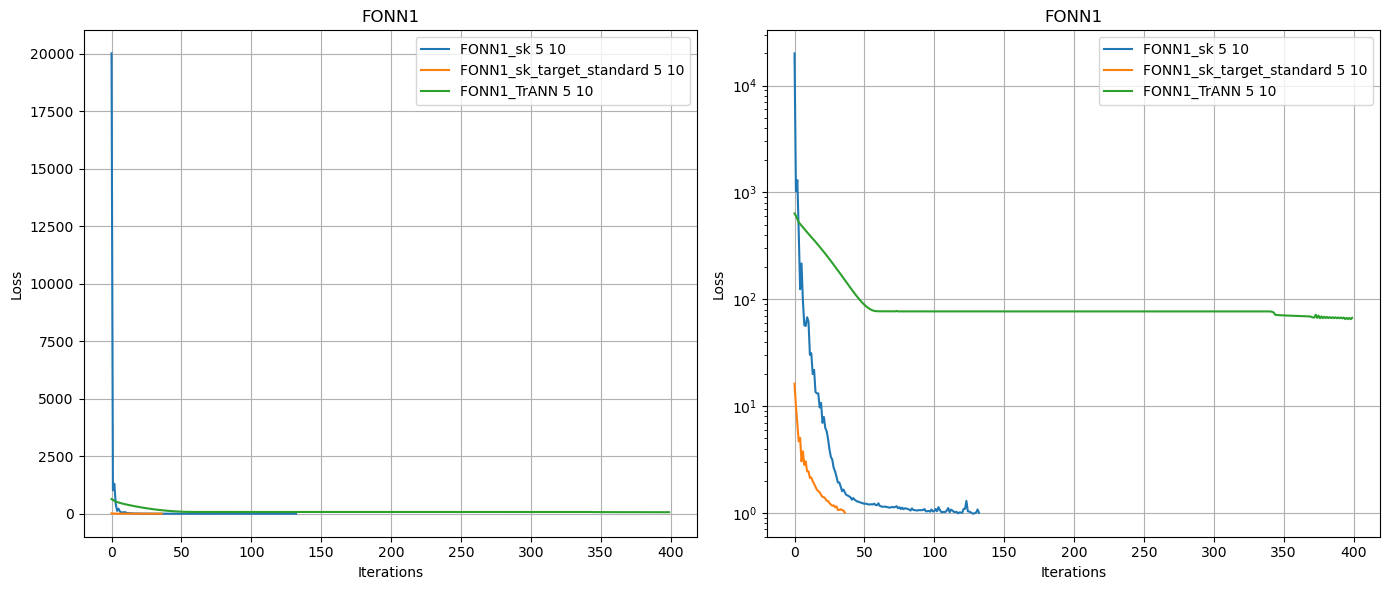

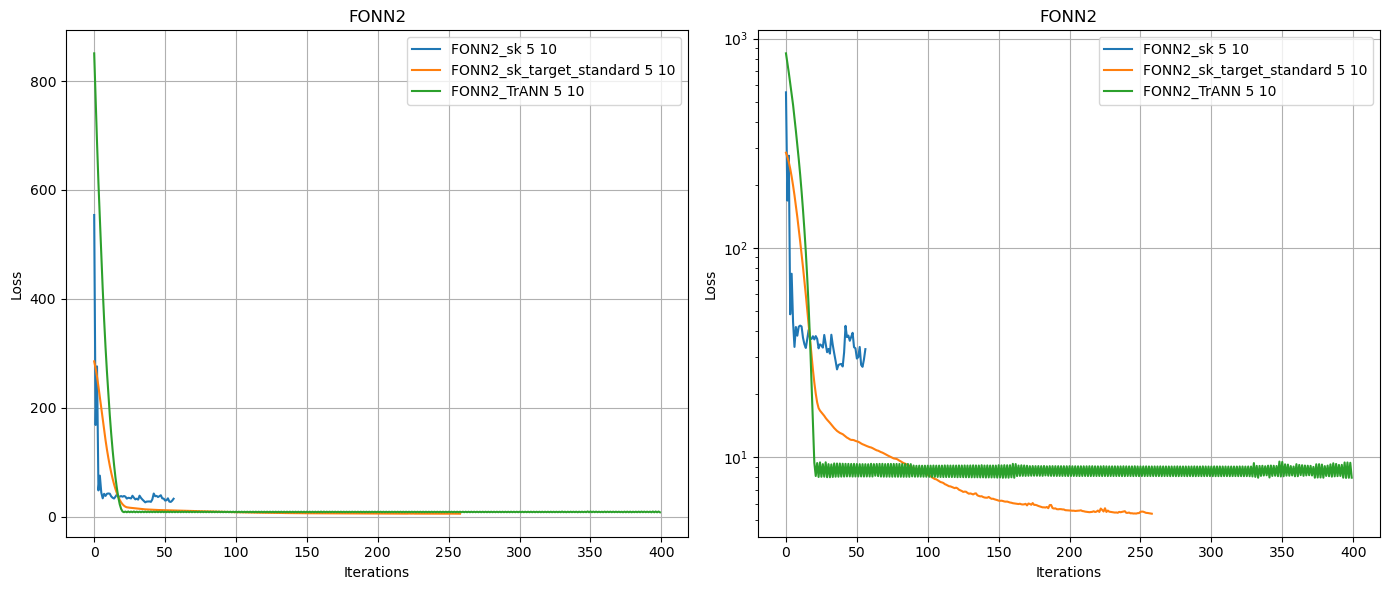

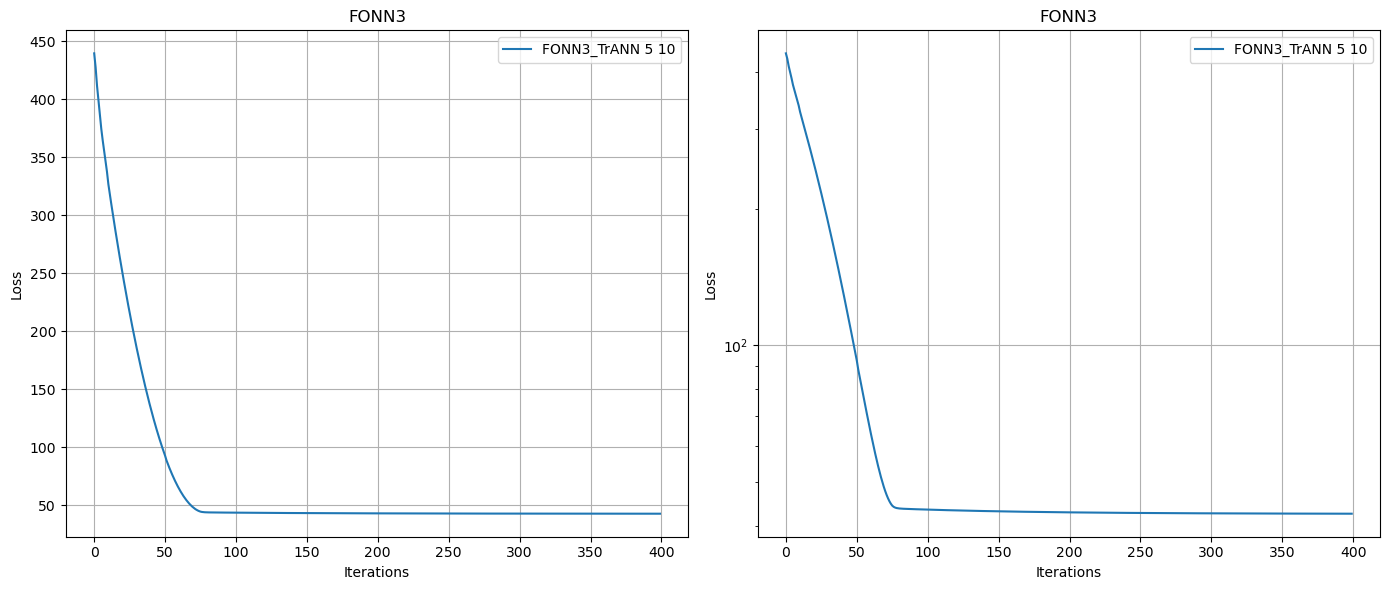

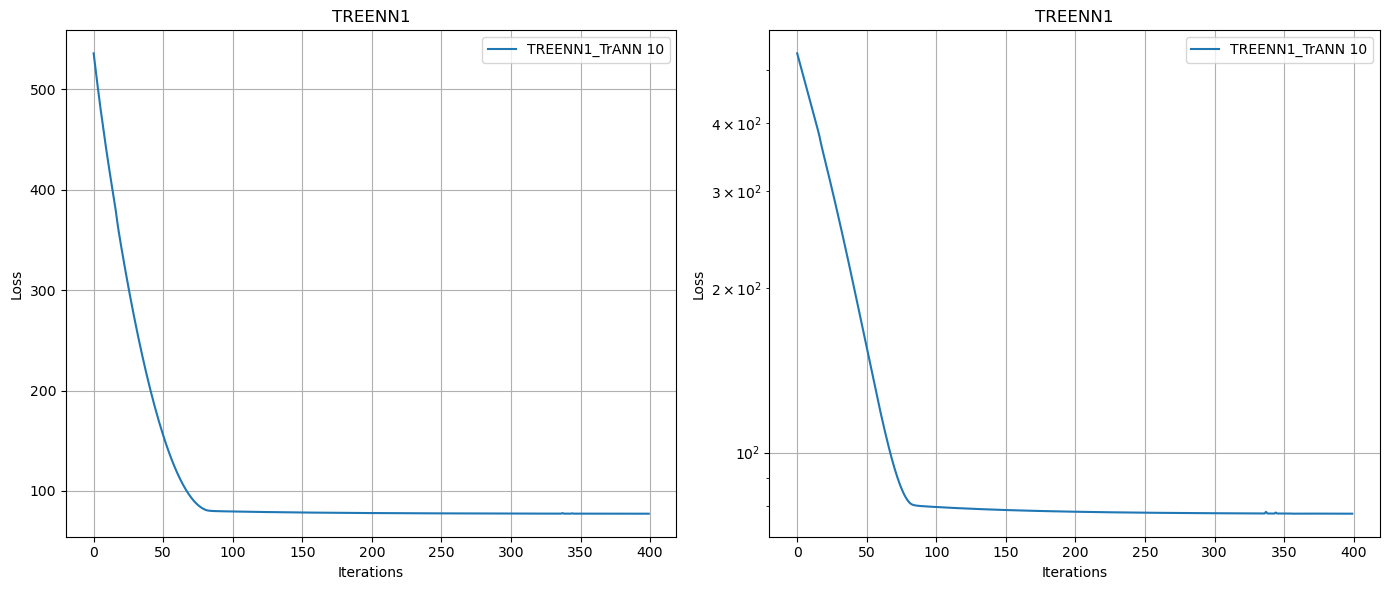

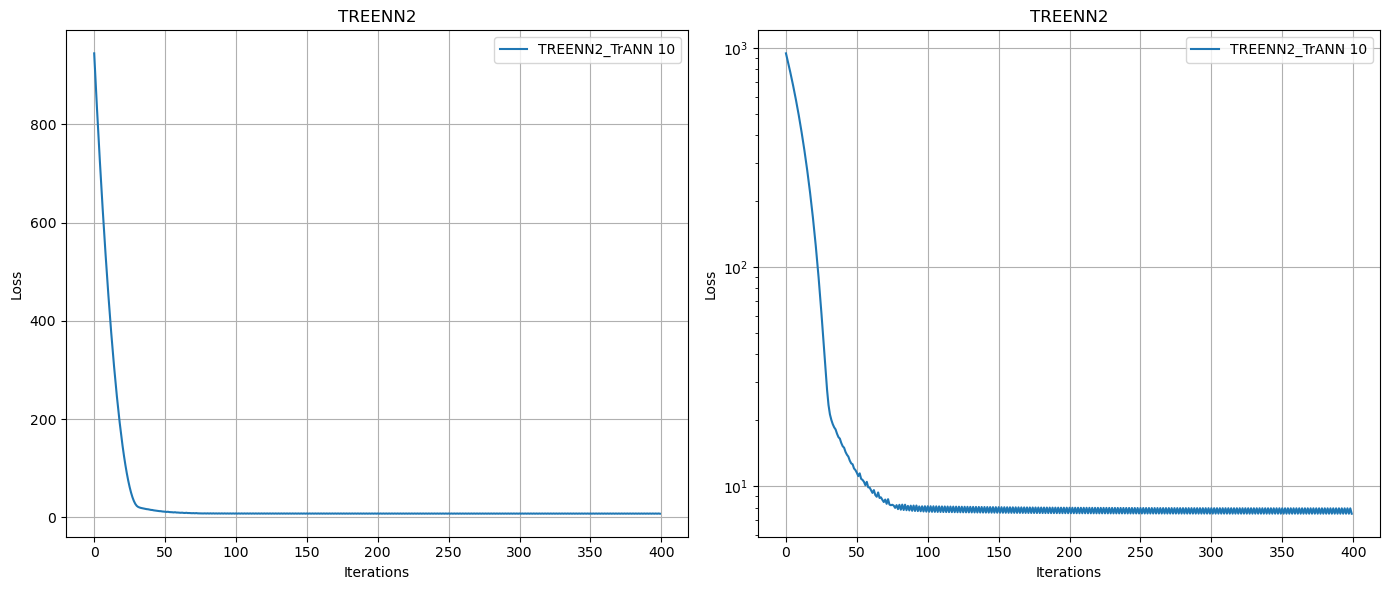

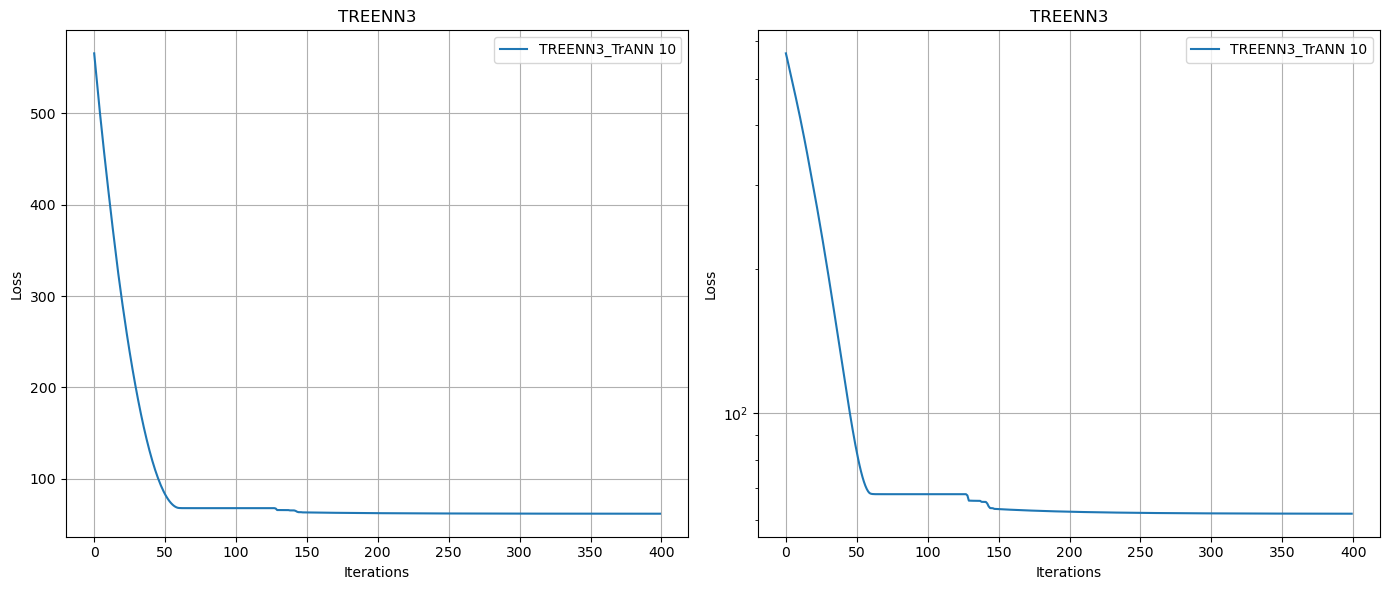

In [20]:
# Plot model groups

plot_groups = {}
for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        key = model_name.split("_" if "_" in model_name else " ")[0]
        if key not in plot_groups:
            plot_groups[key] = plt.subplots(1, 2, figsize=(14, 6))
        fig, (ax1, ax2) = plot_groups[key]
        plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)

for group, plot in plot_groups.items():
    fig, (ax1, ax2) = plot
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.set_title(group)
    ax1.legend()
    ax1.grid(True)

    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.set_title(group)
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout()
    fig.savefig(f"{output_folder}/models/group_{group}.png")
    fig.show()

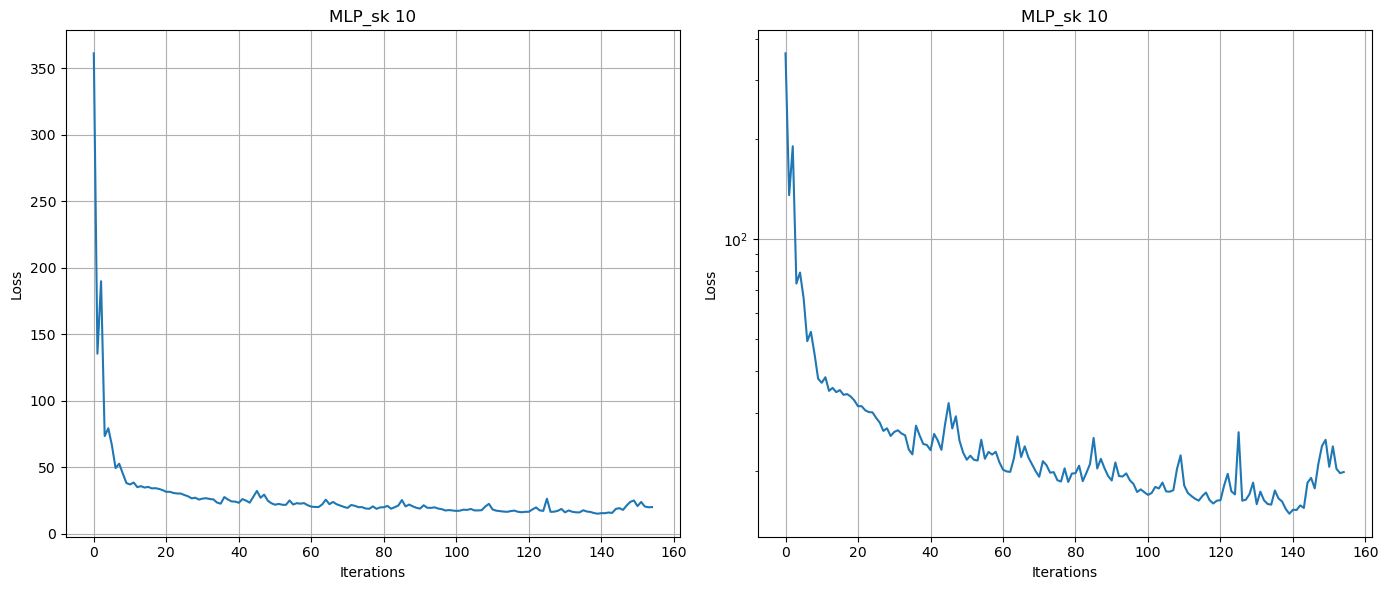

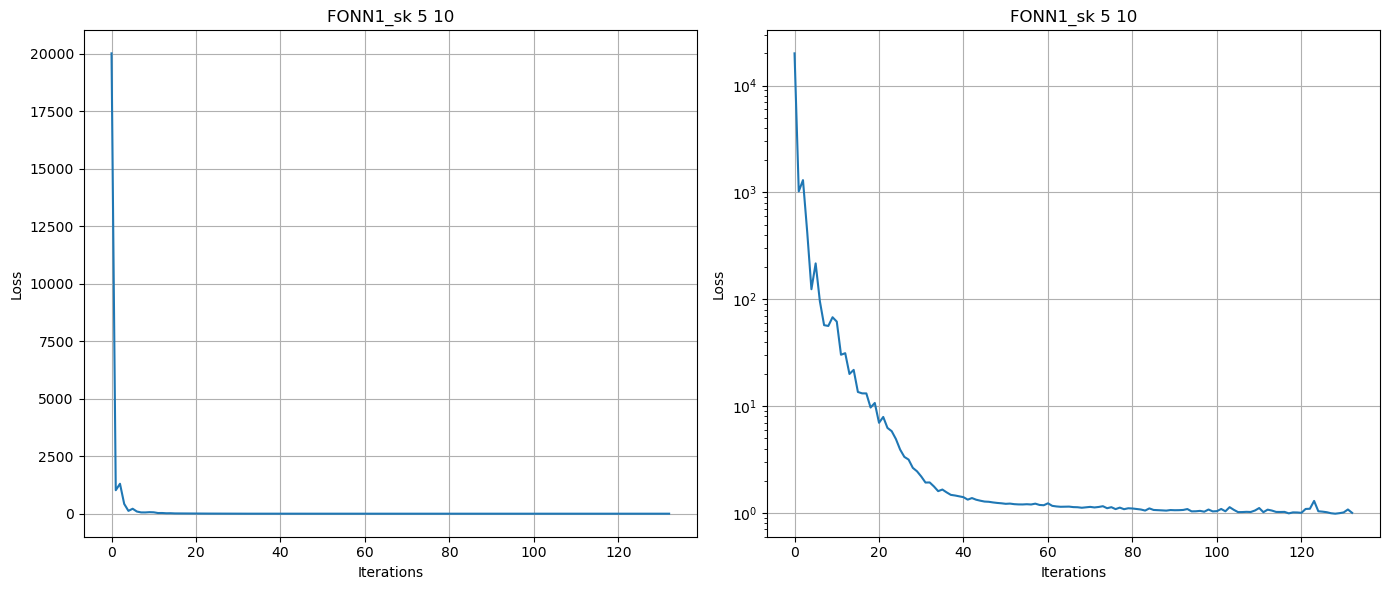

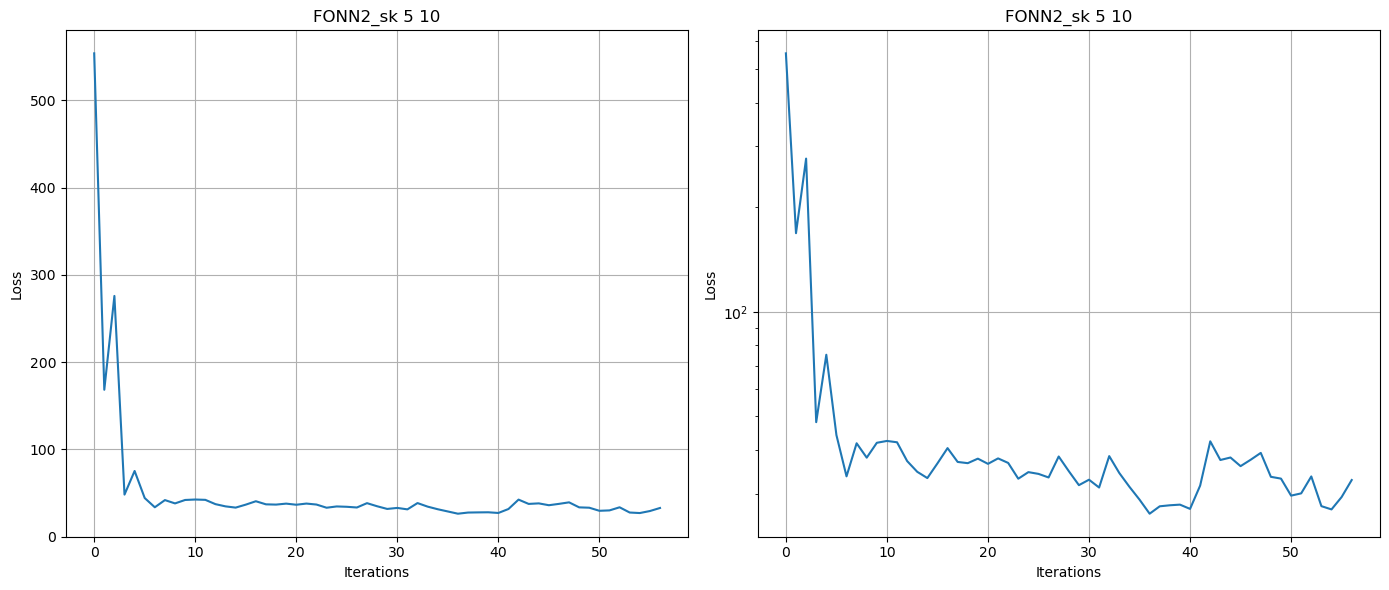

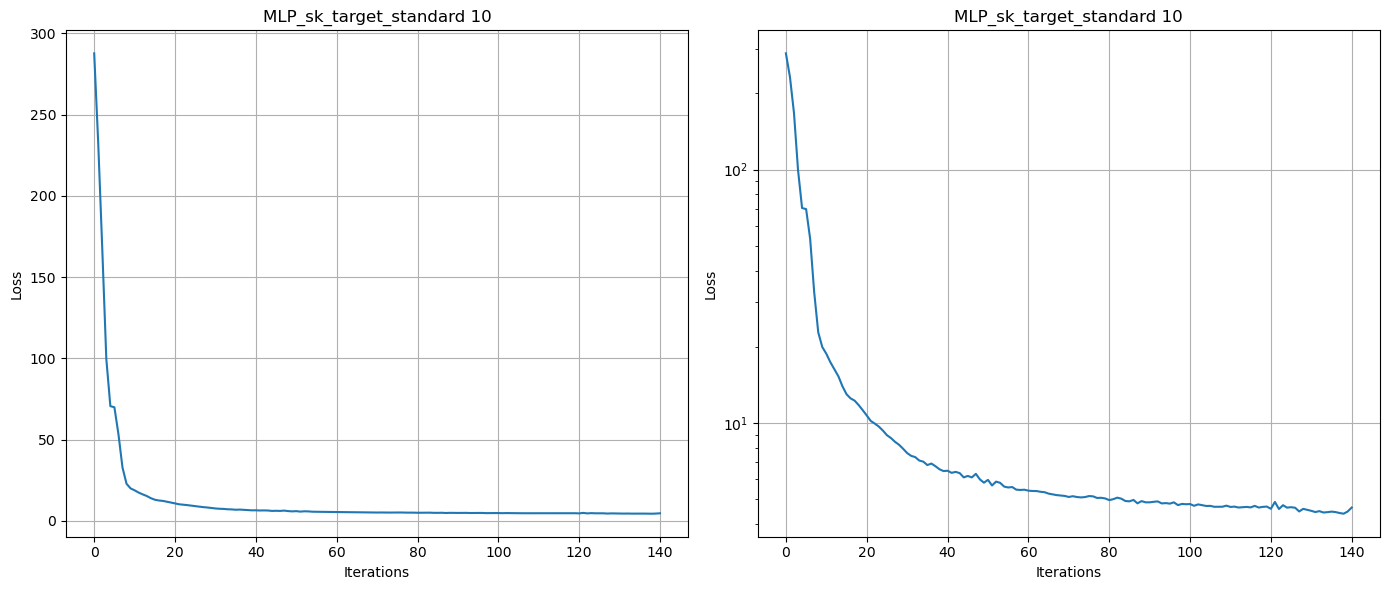

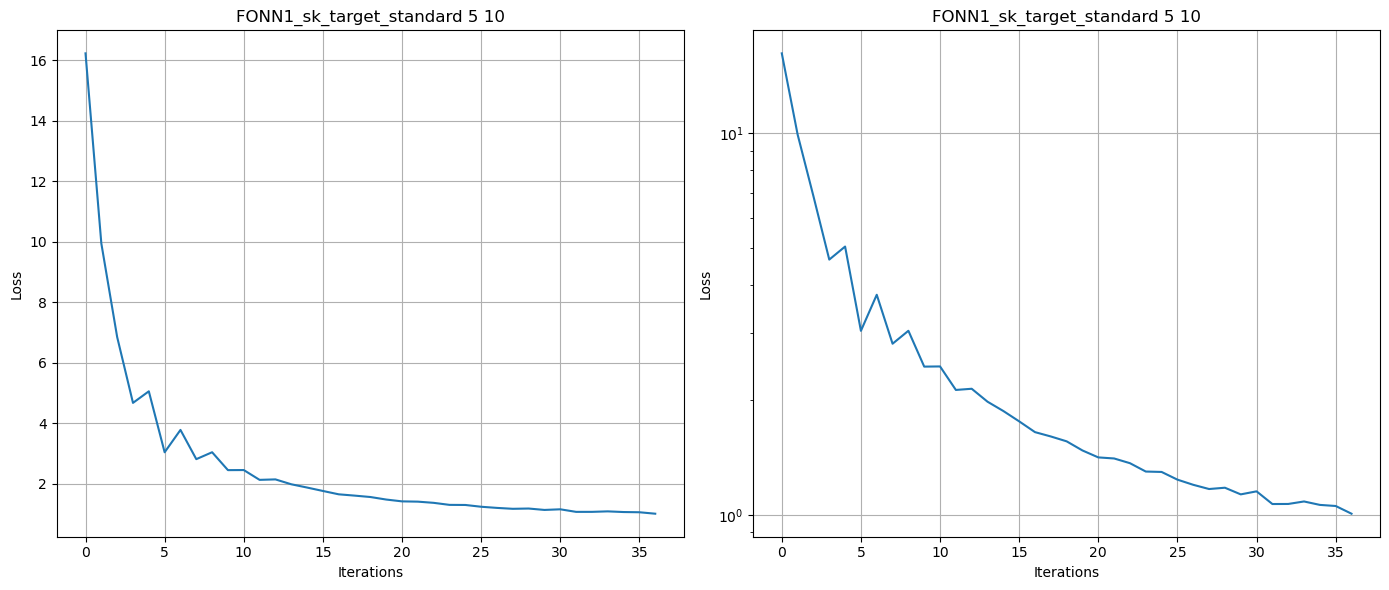

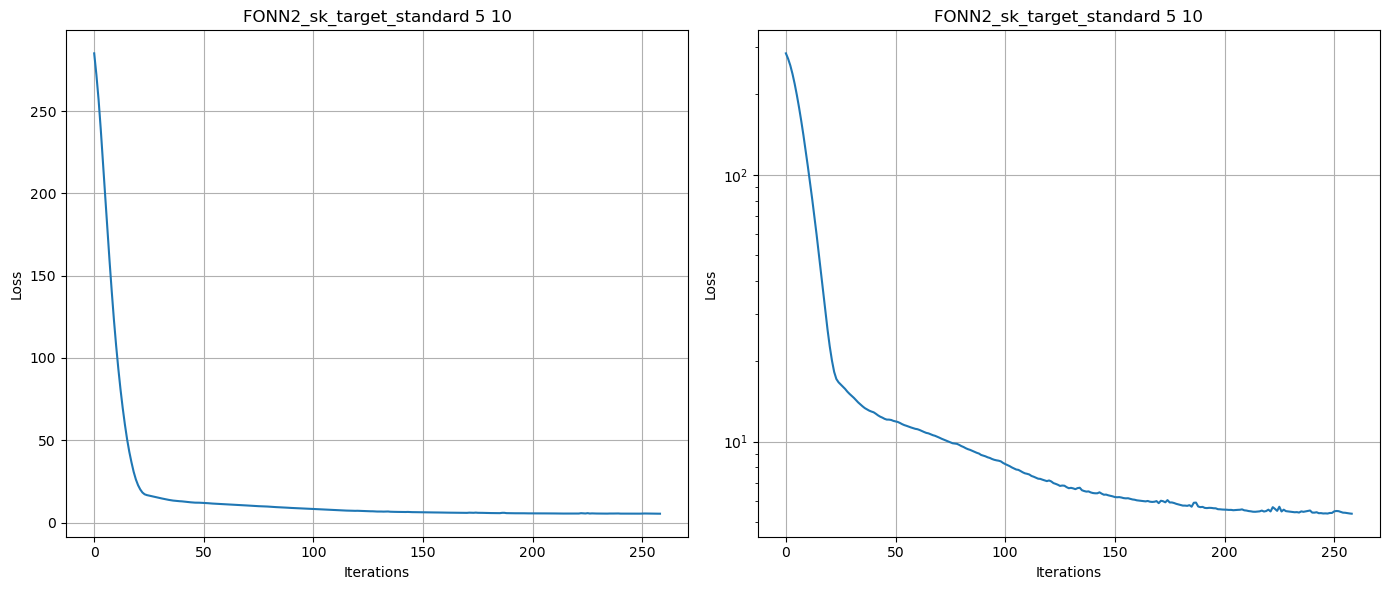

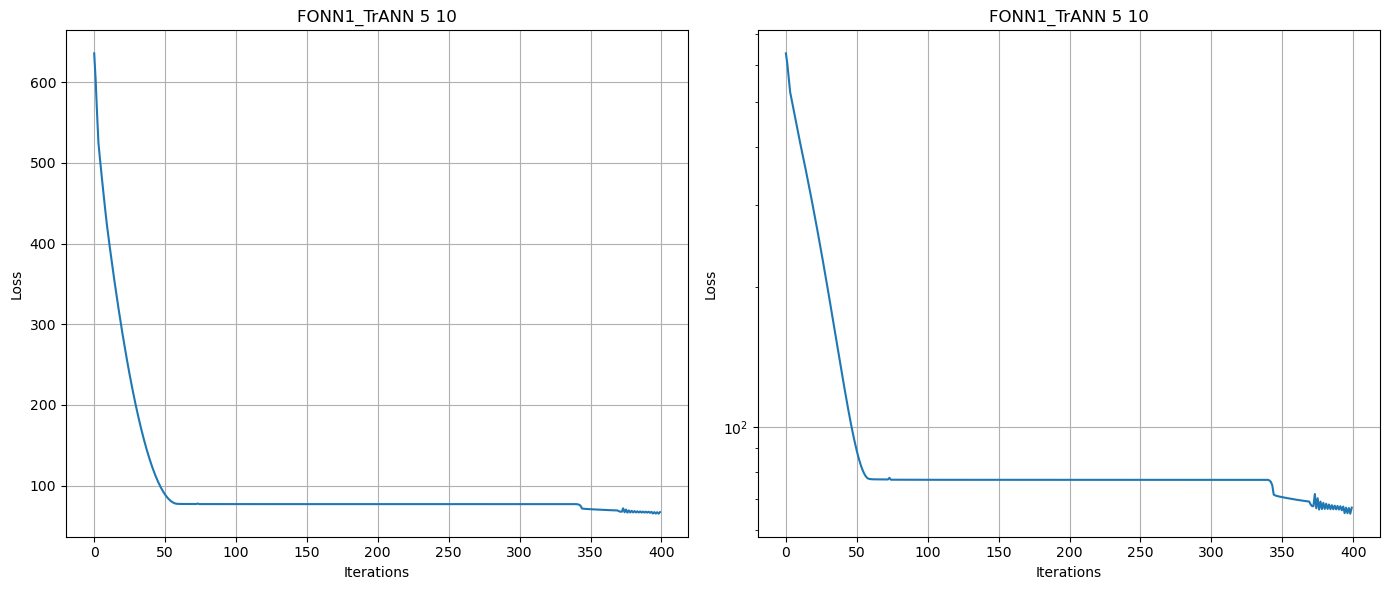

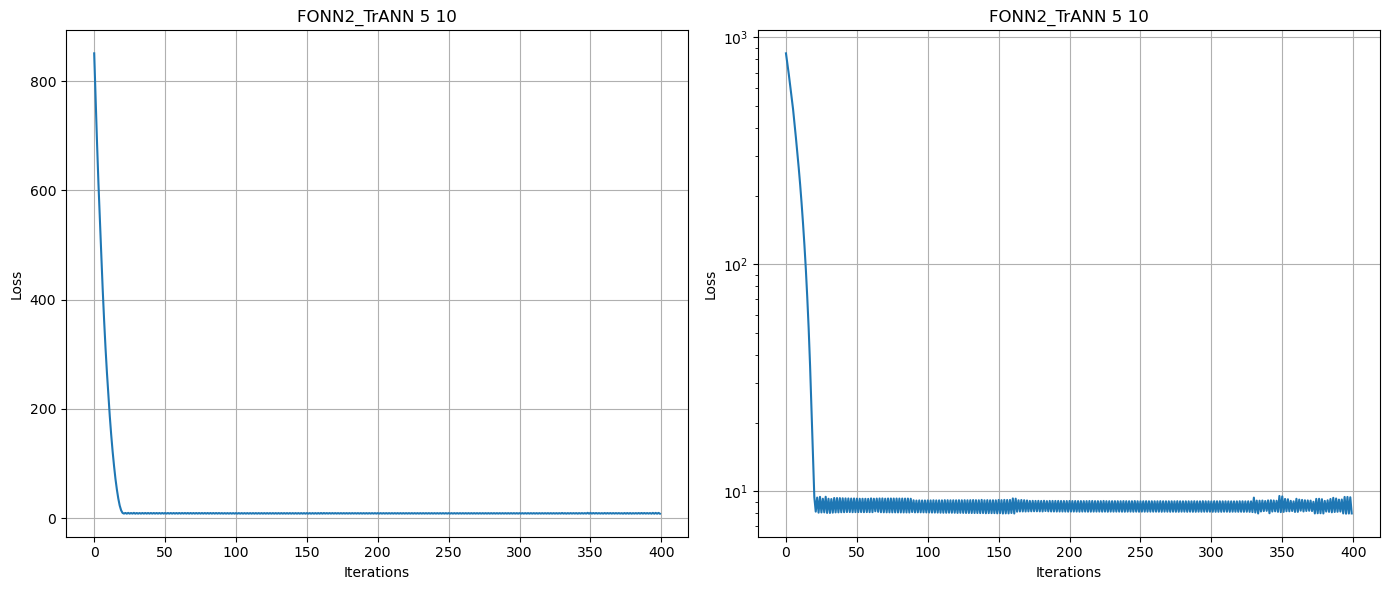

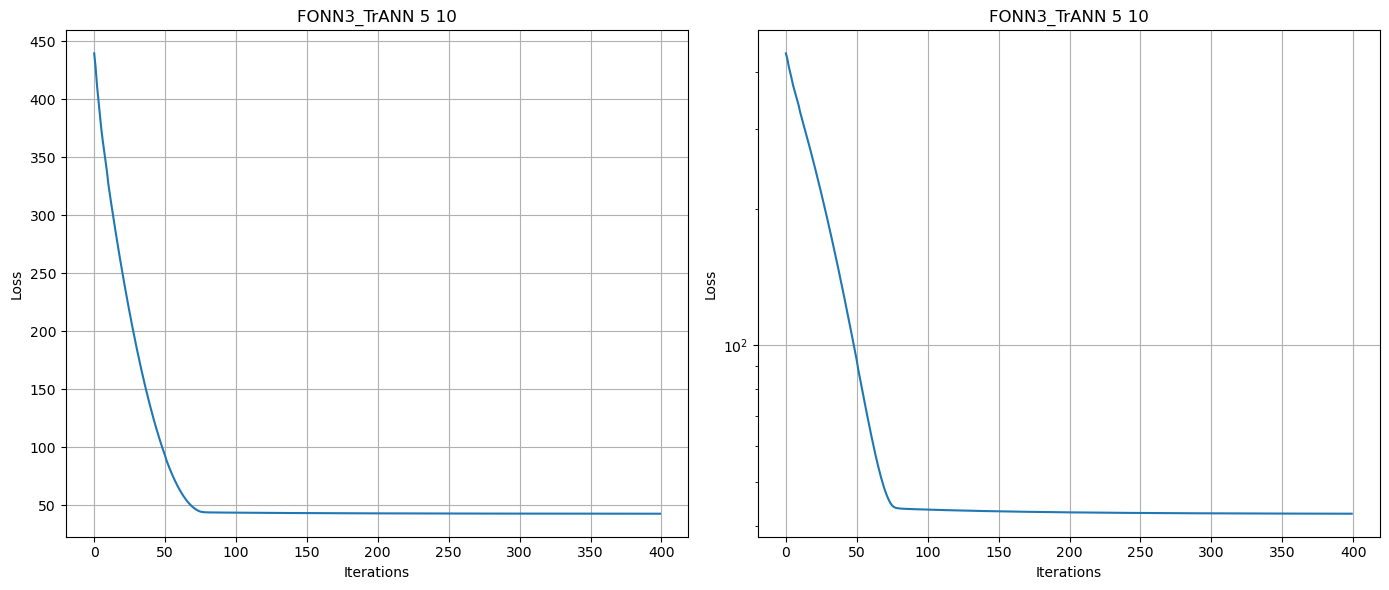

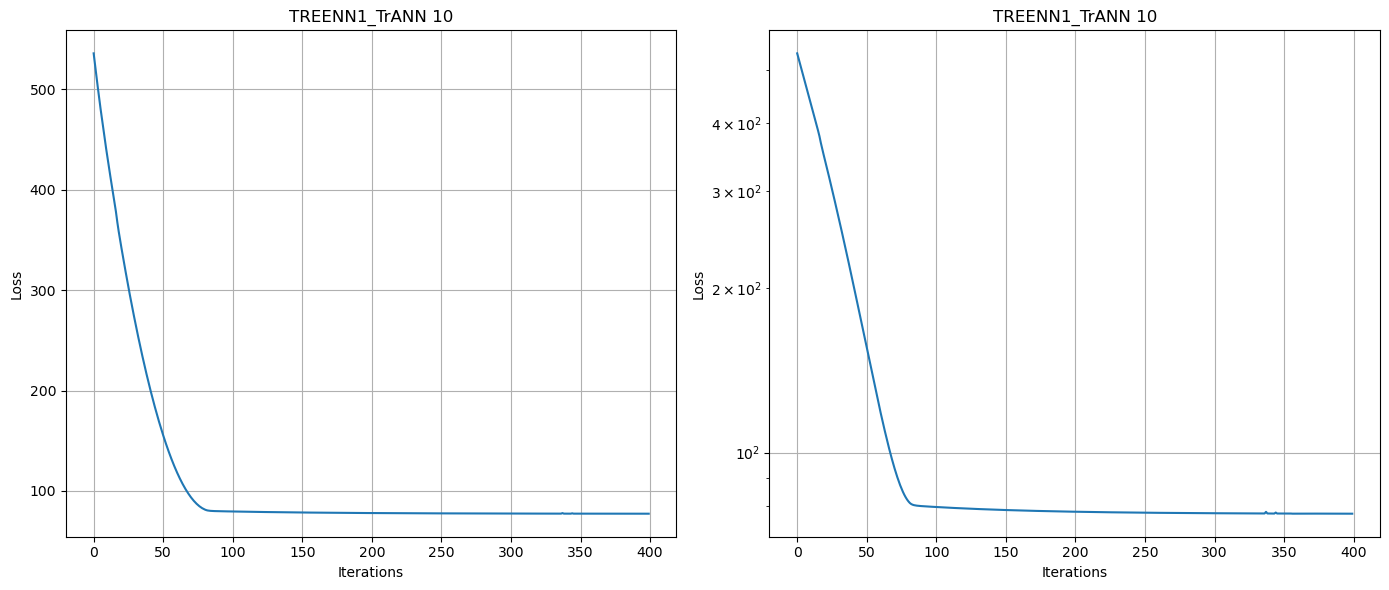

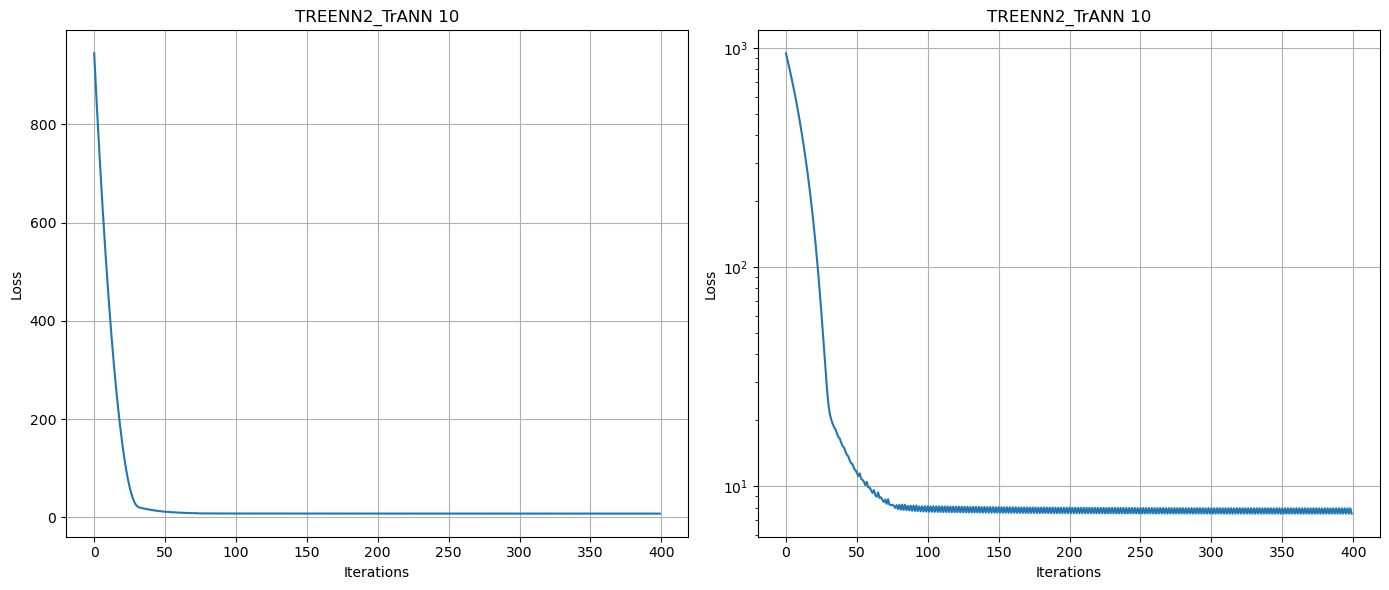

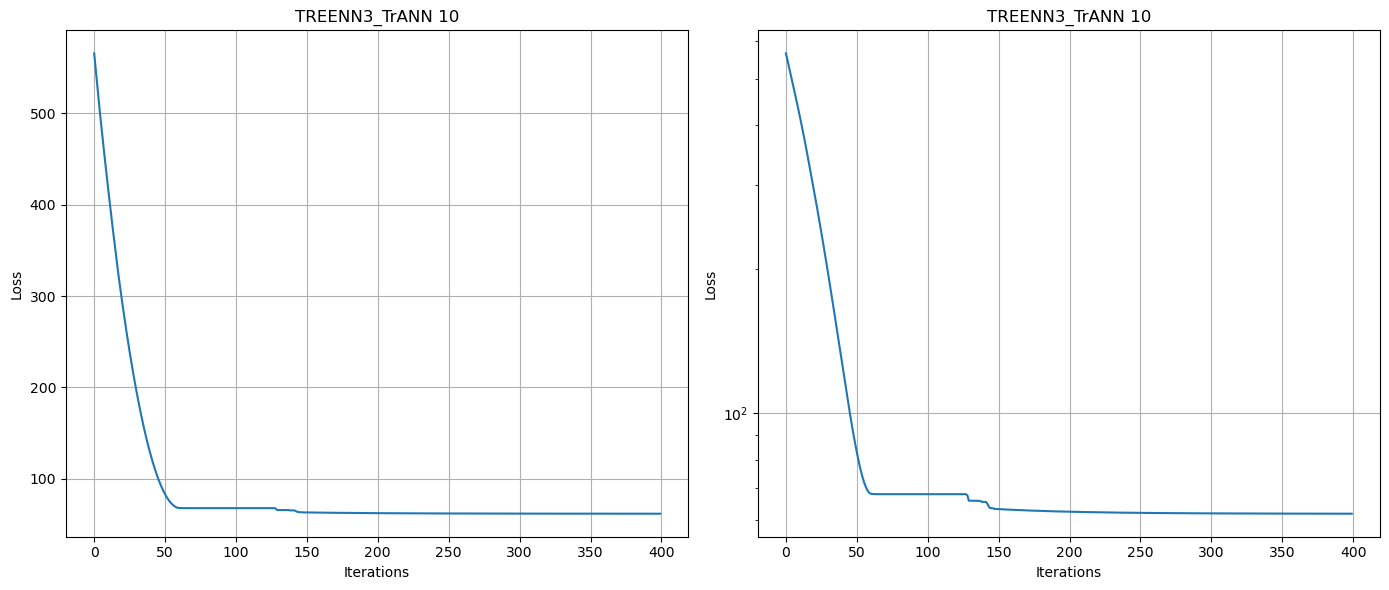

In [21]:
# Plot individual models

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)
        ax1.set_title(model_name)
        ax2.set_title(model_name)
        fig.tight_layout()
        fig.savefig(f"{output_folder}/models/{model_name}.png")
        fig.show()